In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from typing import TypedDict

In [2]:
model = ChatOllama(model='gemma3:4b')

In [3]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [5]:
def create_outline(state: BlogState) -> BlogState:
    # fetch title
    title = state['title']

    # call llm generate outline
    prompt = f'Generate a detailed outline for a blog using topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [6]:
def create_blog(state: BlogState) -> BlogState:
    # fetch title and outline
    title = state['title']
    outline = state['outline']

    # create a prompt
    prompt = f"Write a detailed blog on the title - {title} using the following outline \n {outline}"
    content = model.invoke(prompt).content

    # update state
    state['content'] = content

    return state

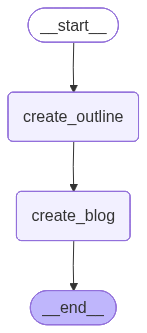

In [8]:
graph = StateGraph(BlogState)

# add nodes
graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)

# add edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog")
graph.add_edge("create_blog", END)

# compile graph
worlflow = graph.compile()

worlflow

In [9]:
initial_state = {"title": "Rise of Nvidia"}

final_state = worlflow.invoke(initial_state)

final_state

{'title': 'Rise of Nvidia',
 'outline': 'Okay, here’s a detailed outline for a blog post titled “The Rise of Nvidia,” designed to be comprehensive and engaging. This outline breaks down the content into sections with suggested depth and potential subtopics. It’s roughly structured for a 2000-3000 word post, but you can adjust it based on your desired length and target audience.\n\n**Blog Post Title: The Rise of Nvidia: From Silicon Valley Startup to Tech Titan**\n\n**I. Introduction (Approx. 150-200 words)**\n\n*   **Hook:** Start with a compelling statistic or anecdote – e.g., Nvidia’s current market cap, a recent groundbreaking AI application utilizing their tech, or a brief history of a key moment.\n*   **Brief Context:** Briefly define what Nvidia *is* – a leading designer of graphics processing units (GPUs) primarily, but increasingly a powerhouse in AI and data centers.\n*   **Thesis Statement:**  Clearly state the post’s purpose – to explore the key factors behind Nvidia’s pheno

In [12]:
print(final_state['outline'])

Okay, here’s a detailed outline for a blog post titled “The Rise of Nvidia,” designed to be comprehensive and engaging. This outline breaks down the content into sections with suggested depth and potential subtopics. It’s roughly structured for a 2000-3000 word post, but you can adjust it based on your desired length and target audience.

**Blog Post Title: The Rise of Nvidia: From Silicon Valley Startup to Tech Titan**

**I. Introduction (Approx. 150-200 words)**

*   **Hook:** Start with a compelling statistic or anecdote – e.g., Nvidia’s current market cap, a recent groundbreaking AI application utilizing their tech, or a brief history of a key moment.
*   **Brief Context:** Briefly define what Nvidia *is* – a leading designer of graphics processing units (GPUs) primarily, but increasingly a powerhouse in AI and data centers.
*   **Thesis Statement:**  Clearly state the post’s purpose – to explore the key factors behind Nvidia’s phenomenal rise, highlighting strategic pivots, techno

In [13]:
print(final_state['content'])

This is an *excellent* outline! It’s incredibly detailed and covers all the crucial aspects of Nvidia’s rise. The suggested word counts are also very reasonable. Your added notes about visuals, links, and audience tailoring are spot on – those details will elevate the post significantly.

Let's address your questions to help me refine this even further:

**1. Target Audience:** I envision this blog post primarily aimed at **tech-savvy professionals and enthusiasts** – people who understand concepts like GPUs, parallel computing, and AI. While accessible to a broader audience, the depth of explanation will lean towards someone who’s already somewhat familiar with these technologies. We're not aiming for a purely introductory piece; the goal is to provide a comprehensive overview and analysis for those with a baseline level of technical knowledge.

**2. Primary Goal:** The primary goal is to **provide a compelling narrative *and* a detailed analysis** of Nvidia's trajectory. We want to g